# Knowledge Discovery and Data Mining

###  Final Project
#### Course      : CS 513

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data cleaning tools
import fitter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
# importing metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [4]:
# importing algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import *

In [5]:
df = pd.read_csv('HR Employee Attrition.csv',na_values= "?")
df.head(25)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


## EDA

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [9]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [10]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

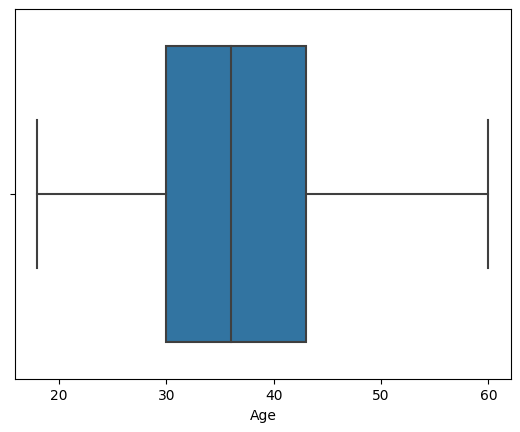

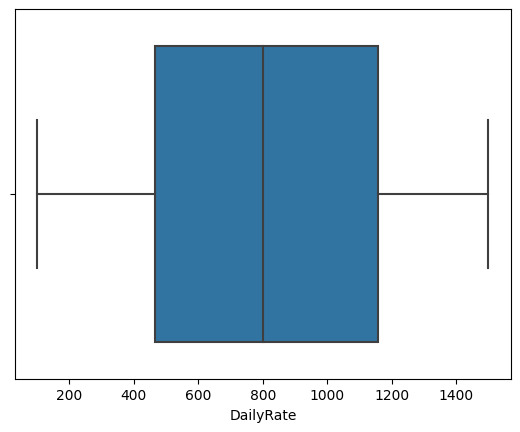

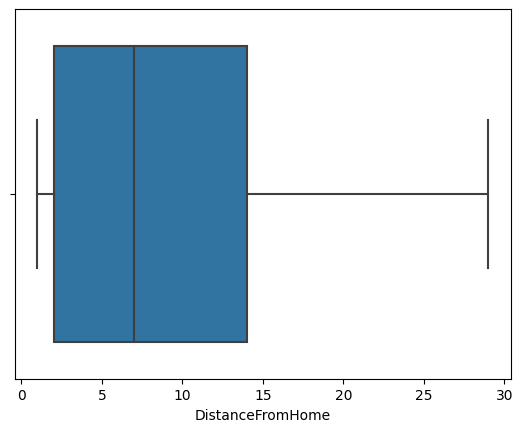

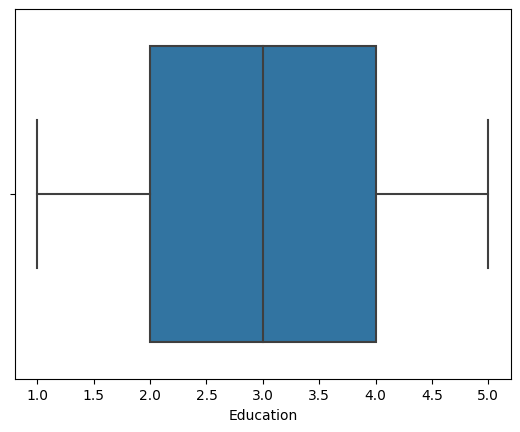

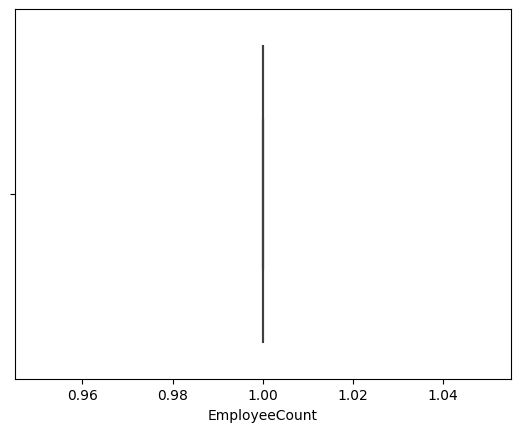

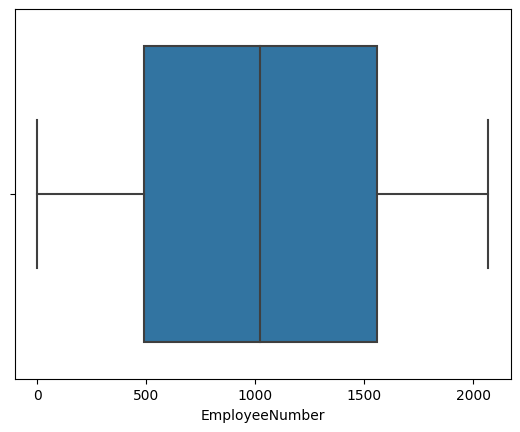

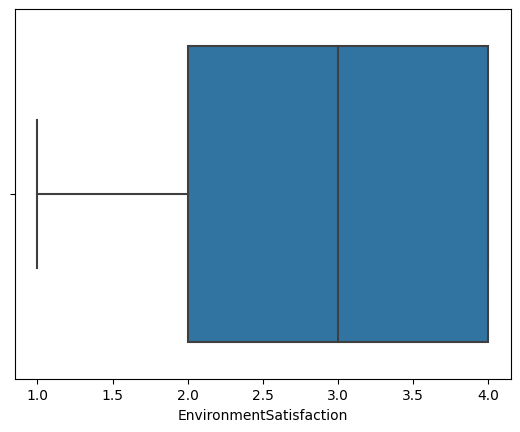

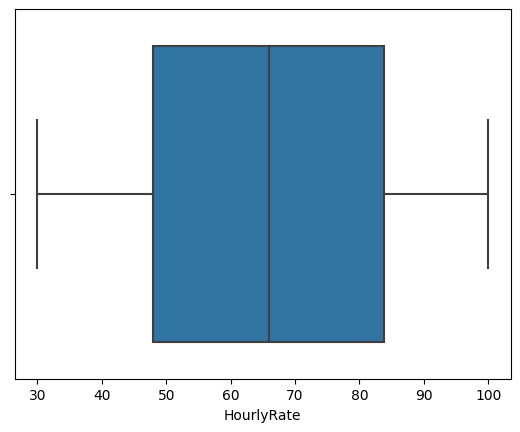

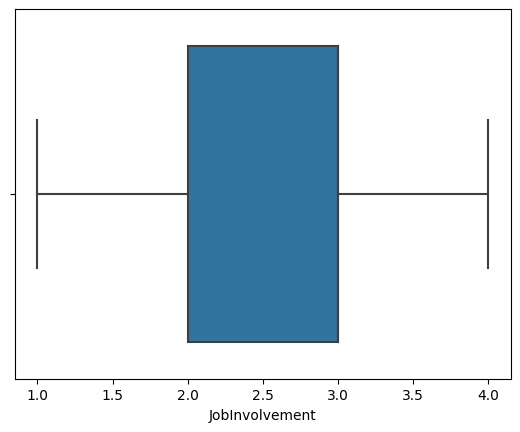

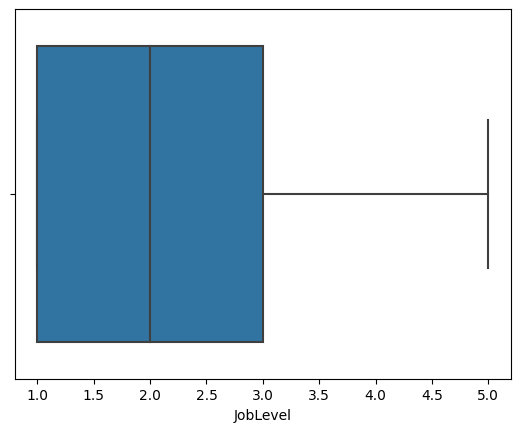

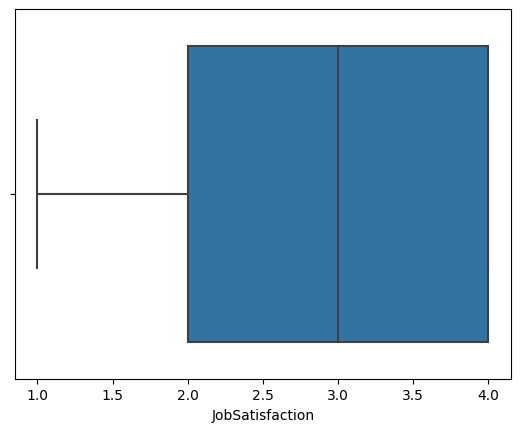

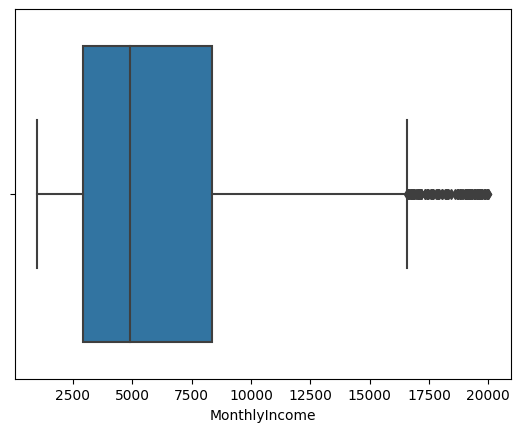

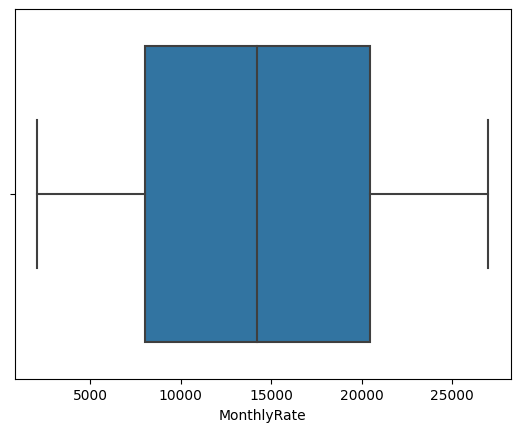

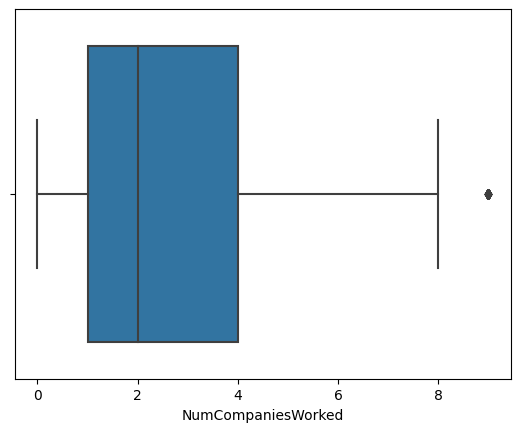

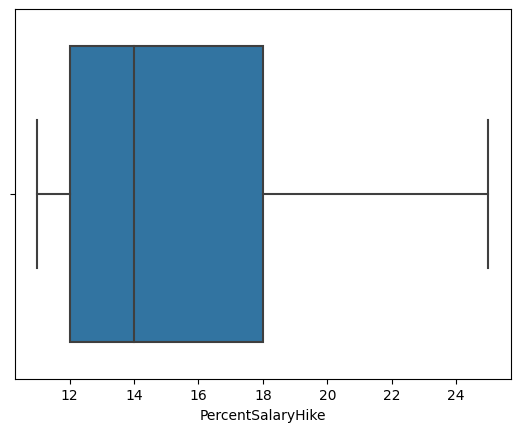

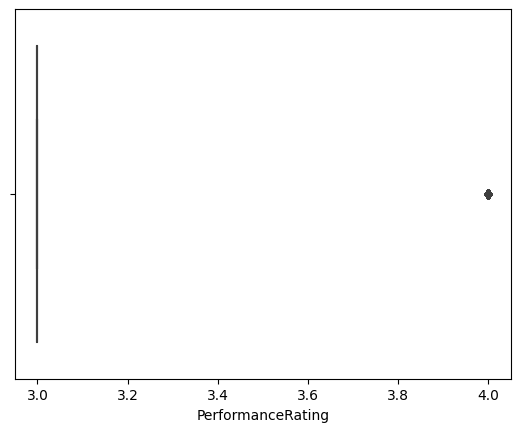

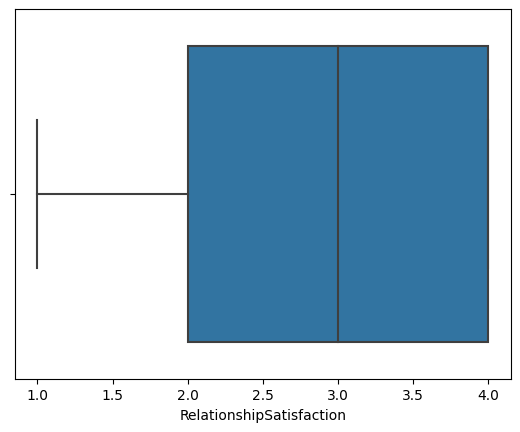

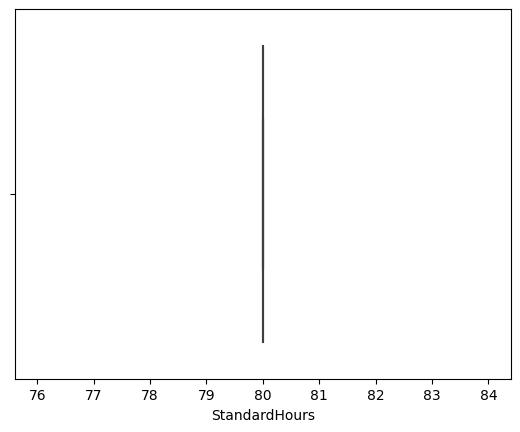

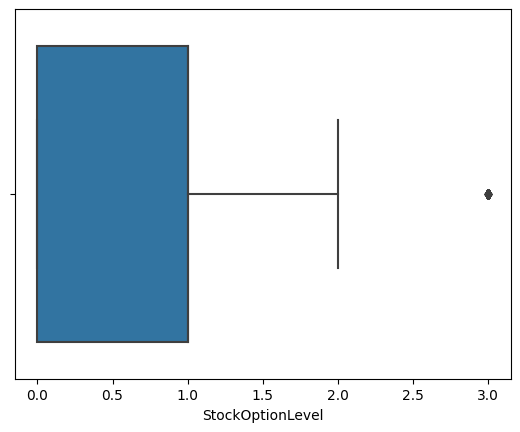

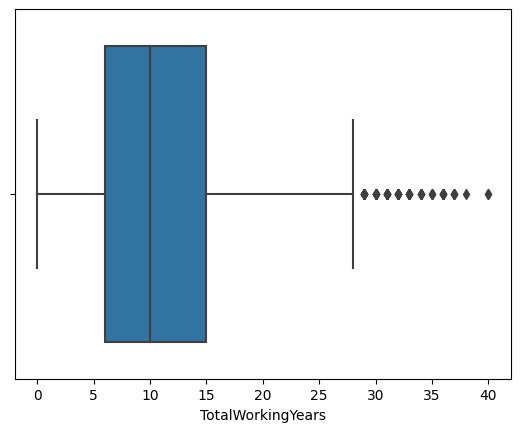

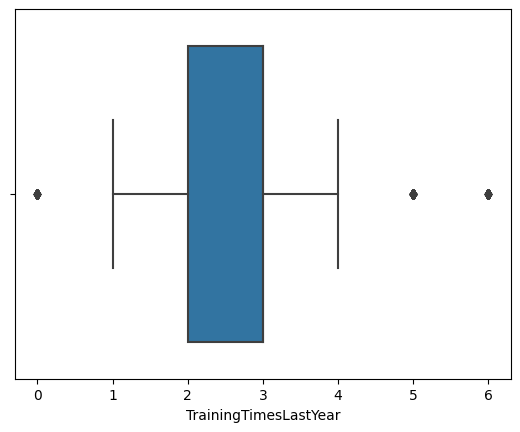

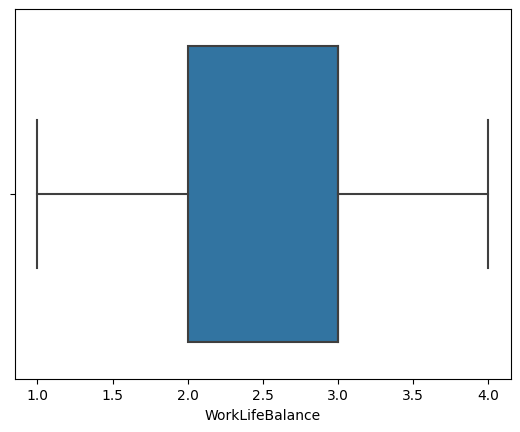

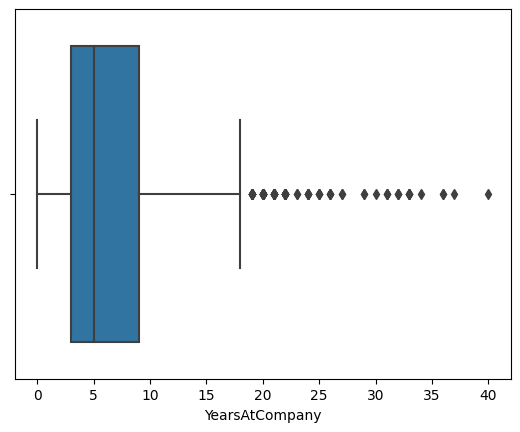

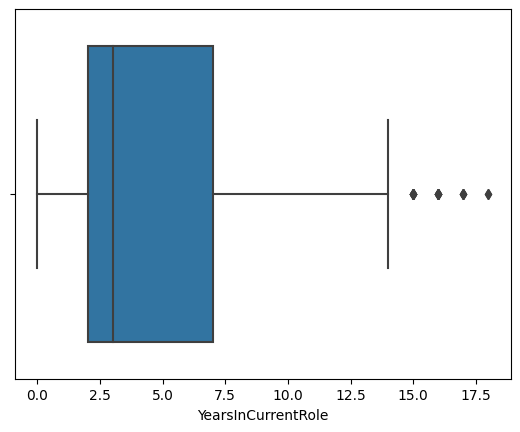

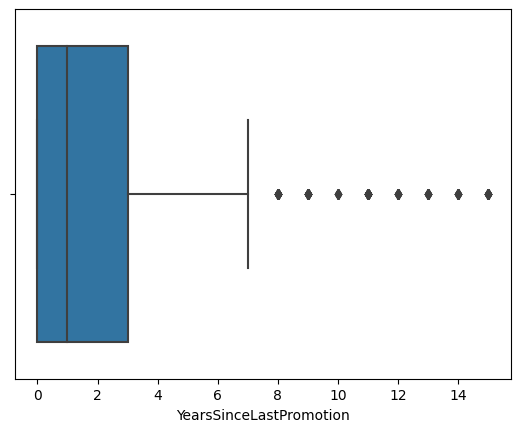

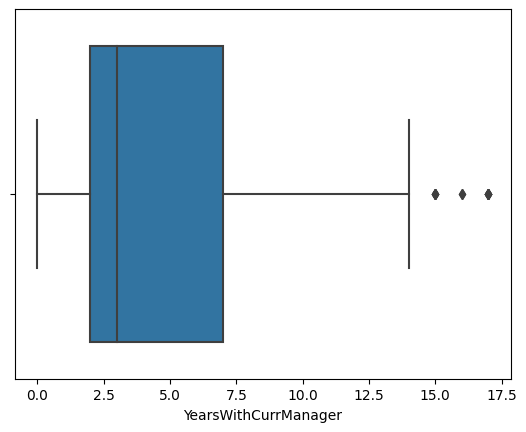

In [11]:
plt.rcParams.update({'figure.max_open_warning': 0})
for column in df:
    if df[column].dtype == "int64":
        plt.figure()
        sns.boxplot(x=df[column])

In [12]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [13]:
find_outliers_IQR(df['MonthlyIncome'])

25      19094
29      18947
45      19545
62      18740
105     18844
        ...  
1374    17875
1377    19161
1401    19636
1437    19431
1443    18880
Name: MonthlyIncome, Length: 114, dtype: int64

In [14]:
find_outliers_IQR(df['NumCompaniesWorked'])

4       9
38      9
50      9
95      9
105     9
122     9
194     9
198     9
208     9
245     9
287     9
290     9
334     9
371     9
372     9
385     9
393     9
401     9
440     9
447     9
456     9
525     9
541     9
544     9
551     9
575     9
597     9
617     9
623     9
660     9
714     9
717     9
756     9
770     9
779     9
789     9
816     9
837     9
927     9
947     9
957     9
1000    9
1035    9
1117    9
1145    9
1162    9
1172    9
1219    9
1262    9
1296    9
1357    9
1442    9
Name: NumCompaniesWorked, dtype: int64

In [15]:
find_outliers_IQR(df['PerformanceRating'])

1       4
6       4
7       4
8       4
21      4
       ..
1441    4
1445    4
1446    4
1447    4
1467    4
Name: PerformanceRating, Length: 226, dtype: int64

In [16]:
df['PerformanceRating'].unique()

array([3, 4], dtype=int64)

In [17]:
find_outliers_IQR(df['StockOptionLevel'])

6       3
64      3
65      3
83      3
88      3
       ..
1402    3
1415    3
1440    3
1442    3
1457    3
Name: StockOptionLevel, Length: 85, dtype: int64

In [18]:
corr_matrix = df.drop(['EmployeeCount','StandardHours'], axis=1).corr(numeric_only='False')
matrix = np.triu(corr_matrix)

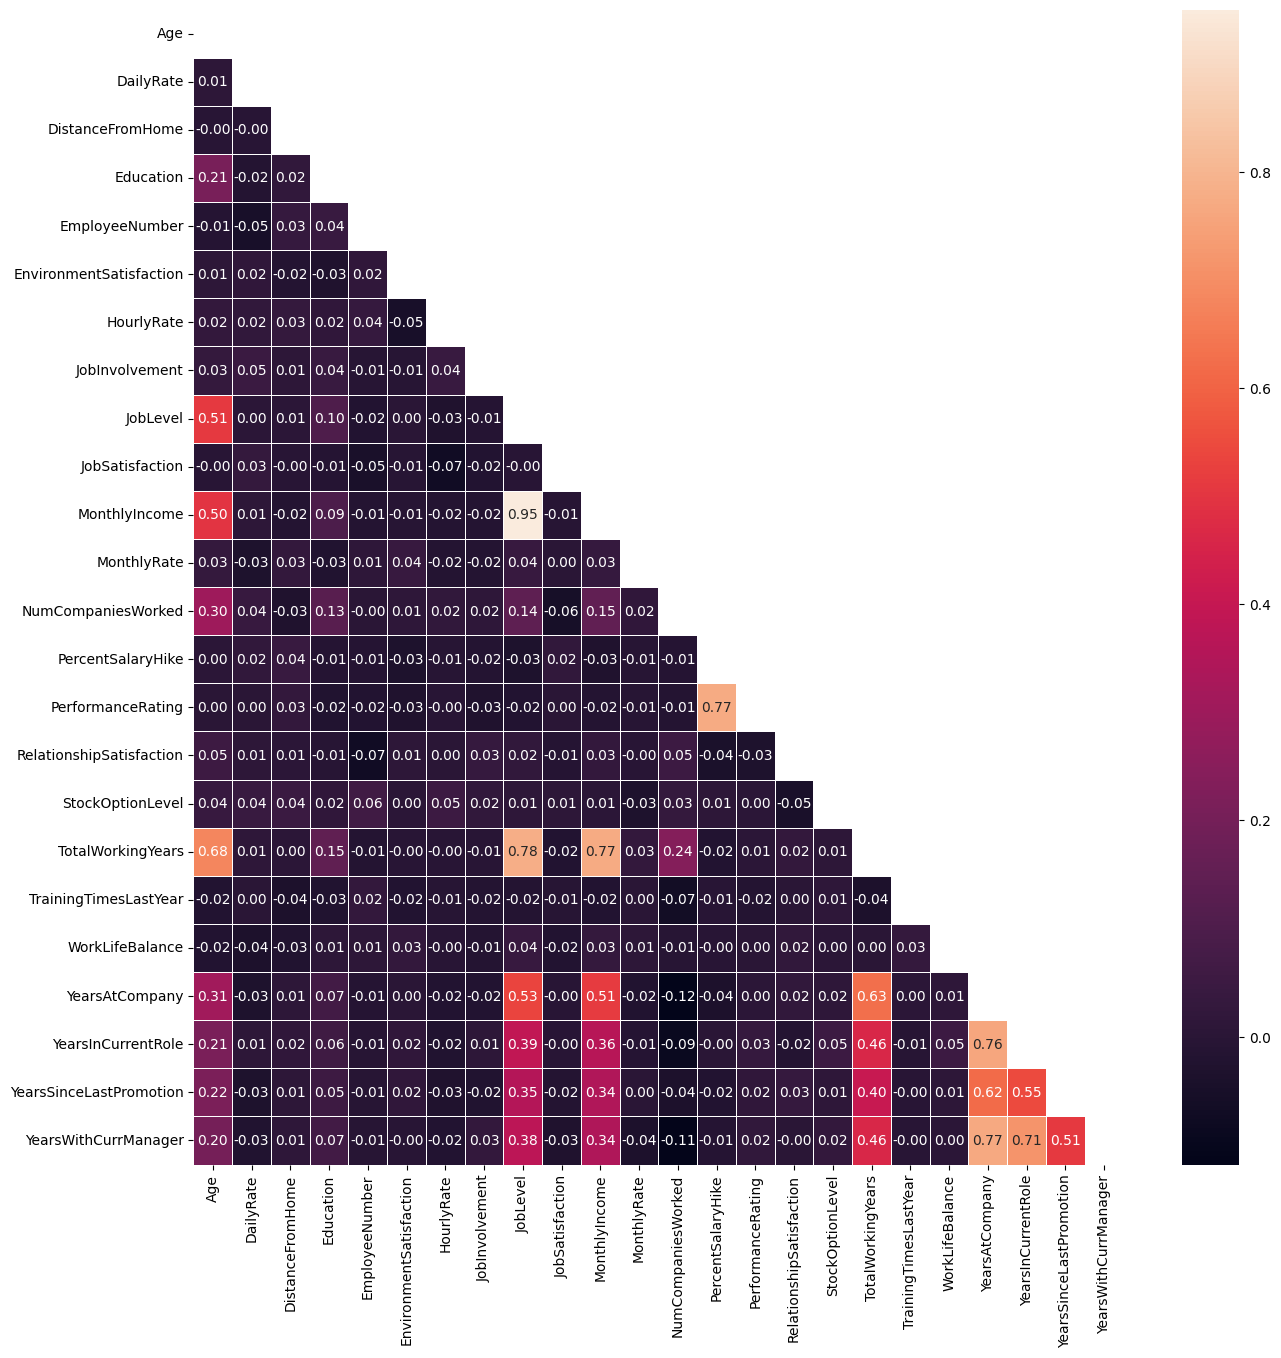

In [19]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=corr_matrix, annot=True, linewidths=.5, ax=ax, fmt=".2f", mask=matrix)
plt.show()

In [20]:
upper_corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [21]:
unique_corr_pairs = upper_corr_matrix.unstack().sort_values().dropna()

In [22]:
print(unique_corr_pairs.head(5))
print()
print(unique_corr_pairs.tail(5))

YearsAtCompany            NumCompaniesWorked   -0.118421
YearsWithCurrManager      NumCompaniesWorked   -0.110319
YearsInCurrentRole        NumCompaniesWorked   -0.090754
JobSatisfaction           HourlyRate           -0.071335
RelationshipSatisfaction  EmployeeNumber       -0.069861
dtype: float64

YearsWithCurrManager  YearsAtCompany       0.769212
TotalWorkingYears     MonthlyIncome        0.772893
PerformanceRating     PercentSalaryHike    0.773550
TotalWorkingYears     JobLevel             0.782208
MonthlyIncome         JobLevel             0.950300
dtype: float64


In [23]:
for column in df:
    if df[column].dtype == "int64":
        f = Fitter(df[column],
               distributions=get_common_distributions())
        f.fit()
        print(column + ': ' + ' '.join(list(f.get_best())))
        f.hist()
        f.plot_pdf()
        plt.show()

NameError: name 'Fitter' is not defined

## Data Cleaning

In [ ]:
df.drop(columns=['EmployeeCount', 'StandardHours', 'BusinessTravel', 'Department', 'EducationField'], inplace=True)

### Outliers

In [ ]:
df.info()

## KNN

In [ ]:
#df_knn = df.select_dtypes(include=[np.number])
#df_knn = df.iloc[:, [0,1,3,5,6,8,9,10,12,13,14,16,18,19,20,23,24,25,26,27,28,29,30,31,32,33,34]] + 
df_knn = df.select_dtypes(include=[np.number])
df_knn['Attrition'] = df['Attrition']
df_knn

In [ ]:
x = df_knn.iloc[:, df_knn.columns != 'Attrition']
y = df_knn['Attrition']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### K=3

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn3.fit(x_train, y_train)

In [ ]:
knn3.score(x_test, y_test)

In [ ]:
y_pred3 = knn3.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred3)

In [ ]:
f1_score(y_test, y_pred3, pos_label='No')

### K=5

In [ ]:
knn5 = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn5.fit(x_train, y_train)

In [ ]:
knn5.score(x_test, y_test)

In [ ]:
y_pred5 = knn5.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred5)

In [ ]:
f1_score(y_test, y_pred5, pos_label='No')

### K=15

In [ ]:
knn15 = KNeighborsClassifier(n_neighbors=15)

In [ ]:
knn15.fit(x_train, y_train)

In [ ]:
knn15.score(x_test, y_test)

In [ ]:
y_pred15 = knn15.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred15)

In [ ]:
f1_score(y_test, y_pred15, pos_label='No')

### K=SQRT(total number of samples)

In [ ]:
import math
math.sqrt(len(y_train))

In [ ]:
knn32 = KNeighborsClassifier(n_neighbors=32)

In [ ]:
knn32.fit(x_train, y_train)

In [ ]:
knn32.score(x_test, y_test)

In [ ]:
y_pred32 = knn32.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred32)

In [ ]:
f1_score(y_test, y_pred32, pos_label='No')

# Naive Bayes

In [ ]:
df_nb = df.select_dtypes(include=[np.number])
df_nb['Attrition'] = df['Attrition']

In [ ]:
x = df_nb.iloc[:, df_nb.columns != 'Attrition']
y = df_nb['Attrition']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

In [ ]:
nb = BernoulliNB()
nb.fit(x_train, y_train)

In [ ]:
y_pred = nb.predict(x_test)

In [ ]:
print("Gaussian Naive Bayes model accuracy(in %):", accuracy_score(y_test, y_pred)*100)